In [2]:
import pandas as pd 

In [16]:
software_technique_table = pd.read_excel("./enterprise-attack-v9.0-software.xlsx", "techniques_used")
software_technique_table.drop(columns=["source type", "mapping type", "mapping description", "target type"])
#software_list = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Software', usecols= ['ID'])
#technique_list = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Techniques', usecols= ['ID'])
#software_technique_table

,source ID,source name,target ID,target name
0,S0066,3PARA RAT,T1083,File and Directory Discovery
1,S0066,3PARA RAT,T1573.001,Symmetric Cryptography
2,S0066,3PARA RAT,T1070.006,Timestomp
3,S0066,3PARA RAT,T1071.001,Web Protocols
4,S0065,4H RAT,T1083,File and Directory Discovery
...,...,...,...,...
5709,S0350,zwShell,T1082,System Information Discovery
5710,S0350,zwShell,T1016,System Network Configuration Discovery
5711,S0350,zwShell,T1033,System Owner/User Discovery
5712,S0350,zwShell,T1059.003,Windows Command Shell


In [9]:
# want to plot
# - target ID (=technique ID) by appearance
# - Verteilung der Target IDs plotten
# - Anzahl Techniques pro Software plotten
# Anzahl verschiedener Techniques

# later
# Anzahl tactics pro Technique (Verteilung)
# Welche Tacics haben wieviele verschiedene Techniques
# Anzahl Software/ Techniques über die Jahre

<AxesSubplot:>

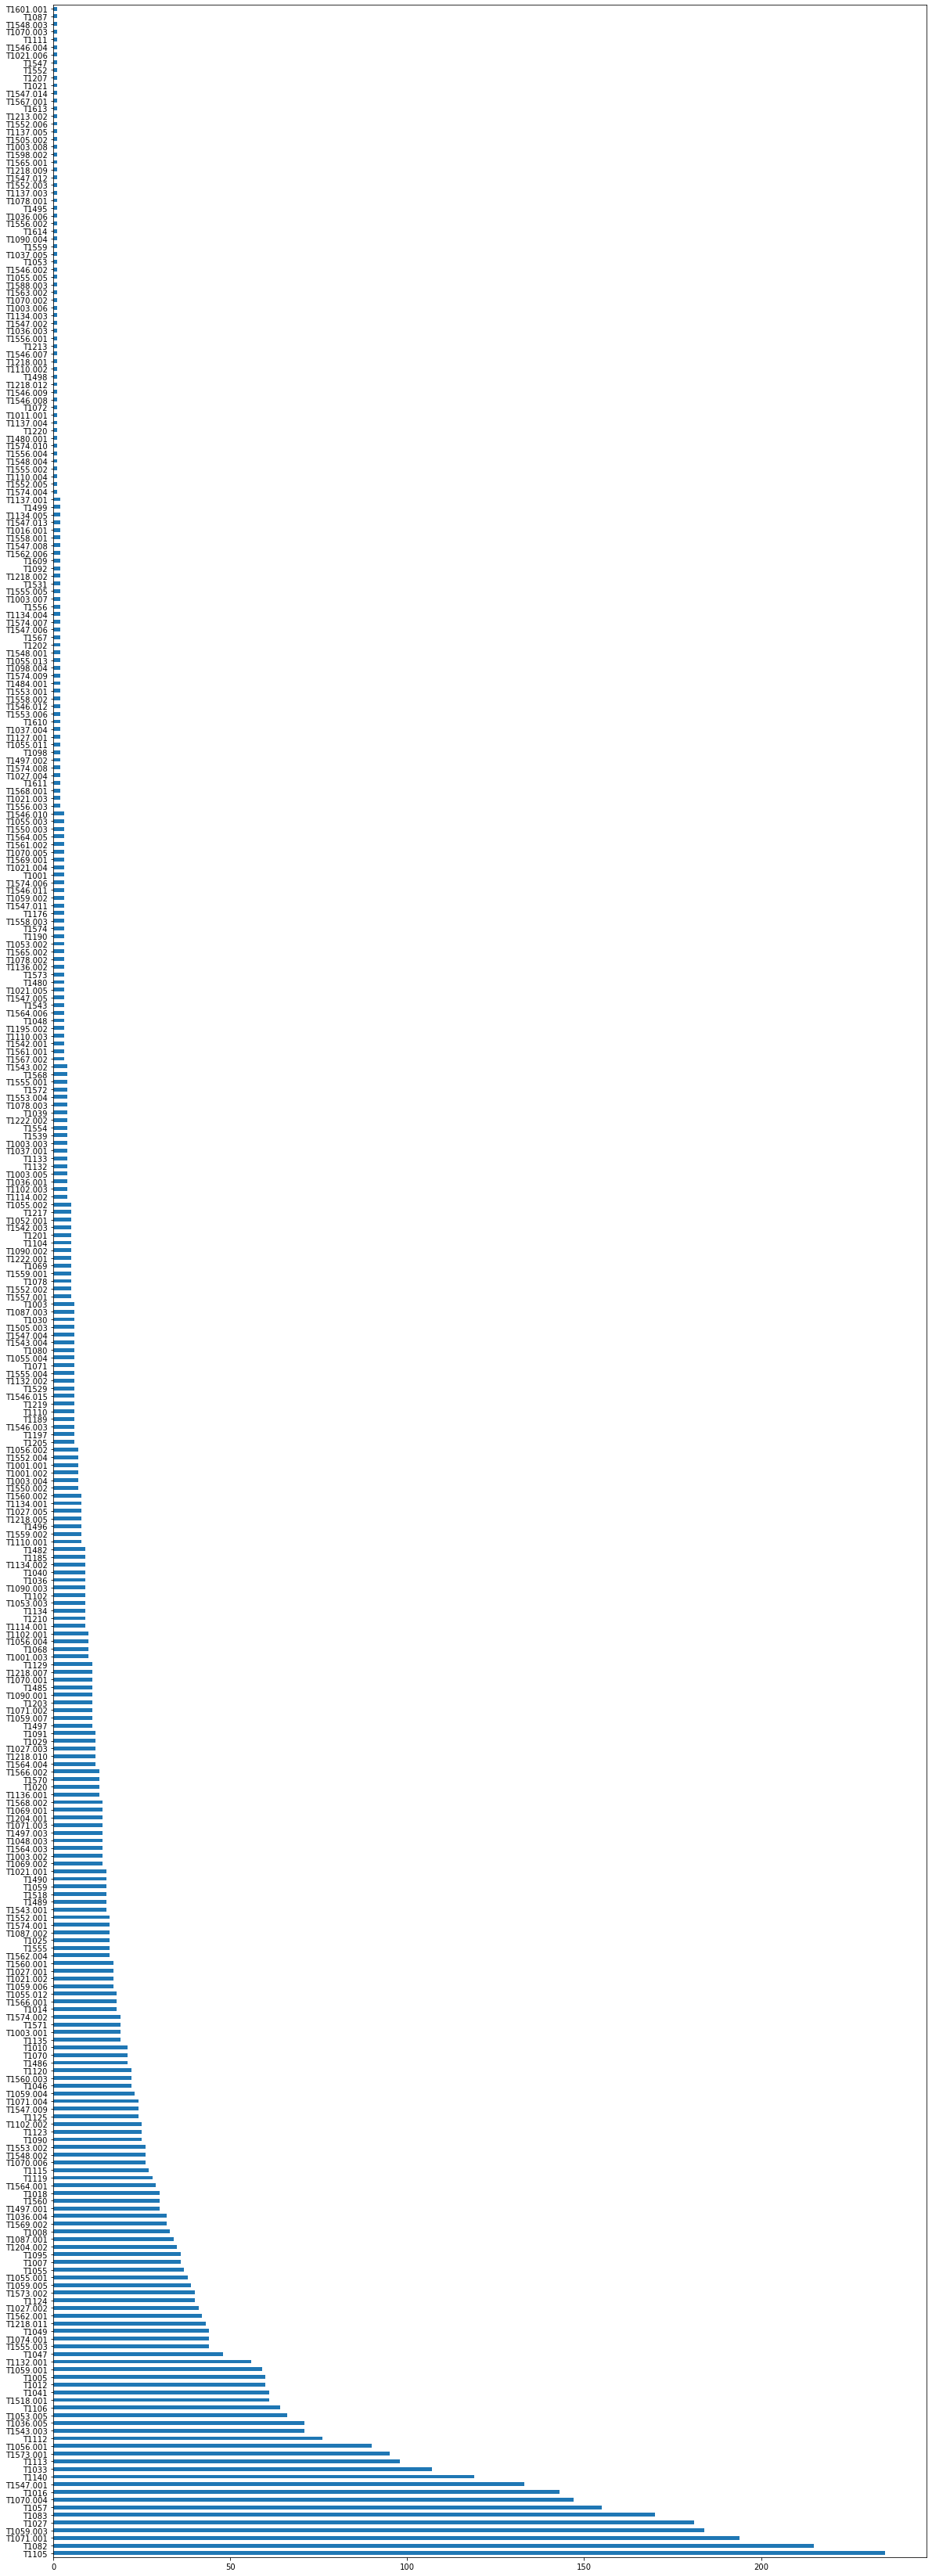

In [22]:
number_of_techniques = software_technique_table["target ID"].value_counts()
#number_of_techniques.plot(kind = 'barh')
software_technique_table["target ID"].value_counts().plot(kind='barh', figsize=(20, 60))

<AxesSubplot:>

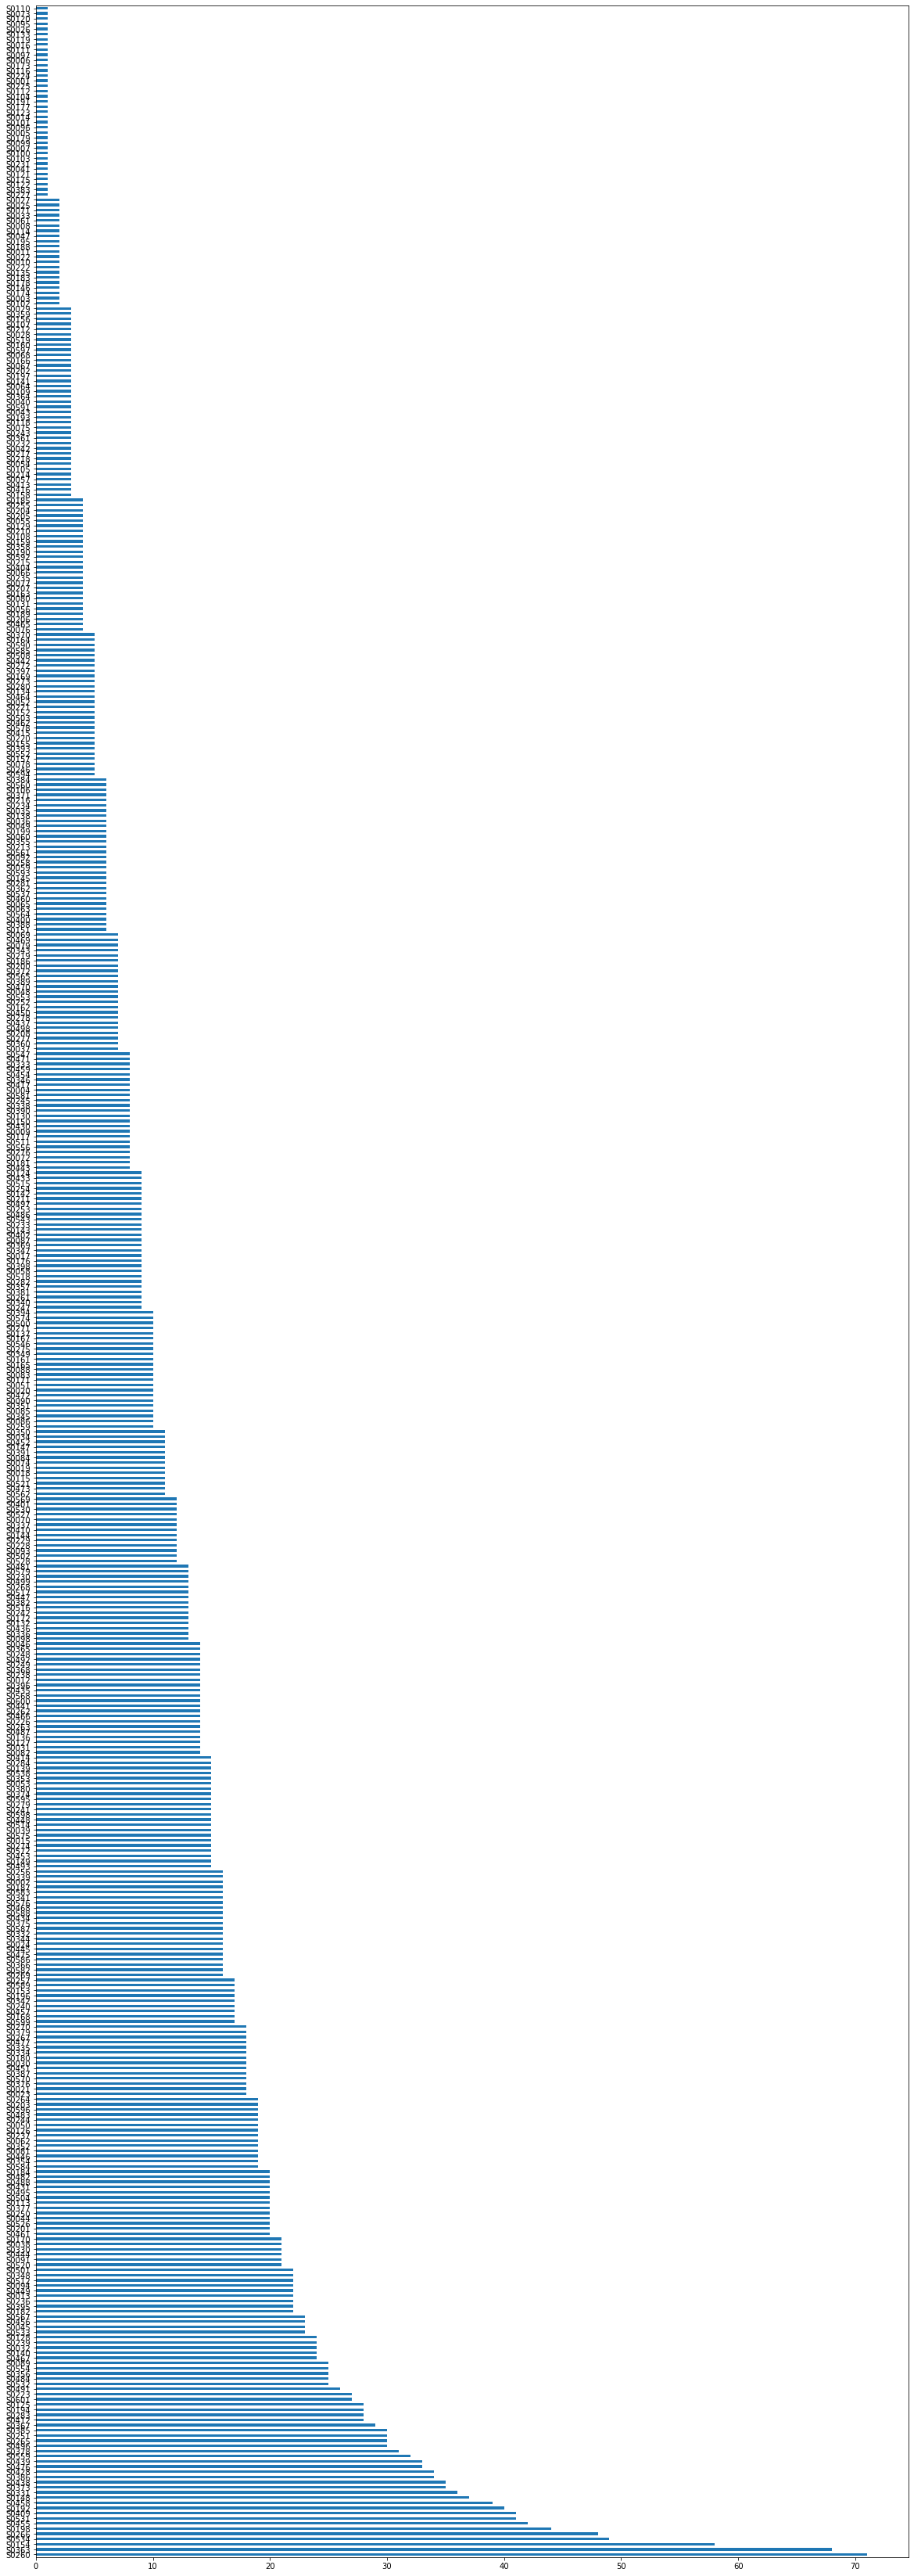

In [26]:
number_of_techniques_per_software = software_technique_table["source ID"].value_counts()
#number_of_techniques_per_software
software_technique_table["source ID"].value_counts().plot(kind='barh', figsize=(20, 60))

In [11]:
#Elisa:
technique_table = pd.read_excel("./enterprise-attack-v9.0-techniques.xlsx", "techniques")
technique_table.drop(columns=["description", "url", "last modified", "detection", "platforms", 
                                       "data sources", "is sub-technique", "sub-technique of", "contributors", 
                                       "permissions required", "defenses bypassed", "supports remote"])

,ID,name,created,version,tactics
0,T1548,Abuse Elevation Control Mechanism,30 January 2020,1.0,"Defense Evasion, Privilege Escalation"
1,T1548.002,Abuse Elevation Control Mechanism: Bypass User...,30 January 2020,2.0,"Defense Evasion, Privilege Escalation"
2,T1548.004,Abuse Elevation Control Mechanism: Elevated Ex...,30 January 2020,1.0,"Defense Evasion, Privilege Escalation"
3,T1548.001,Abuse Elevation Control Mechanism: Setuid and ...,30 January 2020,1.0,"Defense Evasion, Privilege Escalation"
4,T1548.003,Abuse Elevation Control Mechanism: Sudo and Su...,30 January 2020,1.0,"Defense Evasion, Privilege Escalation"
...,...,...,...,...,...
547,T1102.002,Web Service: Bidirectional Communication,14 March 2020,1.0,Command And Control
548,T1102.001,Web Service: Dead Drop Resolver,14 March 2020,1.0,Command And Control
549,T1102.003,Web Service: One-Way Communication,14 March 2020,1.0,Command And Control
550,T1047,Windows Management Instrumentation,31 May 2017,1.1,Execution


In [27]:
# number_of_subtechniques = technique_table.loc[['is sub-technique'] == "WAHR"]

In [188]:
#Vektor an Techniques pro Software
#Tabelle mit Techniques und Software auf den Achsen und vielen Nullen und Einsen 
association = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Association_compact')
matrix = pd.read_excel("./Data collection MITRE ATT&CK.xlsx", sheet_name = 'Vektordarstellung')

matrix = matrix.set_index('ID')
dfmatrix = pd.DataFrame(matrix)

#initialisiere die Werte in der Tabelle mit 0
dfmatrix = dfmatrix.fillna(0)

In [189]:
software = association['source ID']
techniques = association['target ID']

#Es werden Software-Technique-Tupel erstellt und in data gespeichert
data = []
for i in range (len(software)):
    tuple = [(software)[i], (techniques)[i]]
    data.append(tuple)

#Schleife durch die Tupel und dabei werden an der entschrechenden Matrix Einsen eingetragen
for i in data:
    #print (i[0])
    dfmatrix[i[0]][i[1]] = 1   

In [190]:
#Speichere Matrix als .csv
dfmatrix.to_csv('vektordarstellung.csv', sep=";")